<a href="https://colab.research.google.com/github/CeeCeeOkeke/PortfolioProject/blob/main/Loan_Status_Prediction%20Handling%20an%20Unbalanced%20Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependancies


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
loan_dataset = pd.read_csv('/content/loanData.csv')

In [ ]:
loan_dataset.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
#number of rows and columns
loan_dataset.shape

(614, 13)

In [ ]:
# statiscal measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#number of missing values
loan_dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
# dropping the missing values snice they are of different values so we cannot replace them with mean, median etc because some of them are test
loan_dataset = loan_dataset.dropna()

In [4]:
loan_dataset.shape

(480, 13)

In [5]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
#label encoding that is say 1 for YES and 0 for NO instead of the Y & N in the dataset
loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

In [13]:
#printing the first 5 columns
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
loan_dataset.groupby('Loan_Status').mean()

<ipython-input-15-944025adb032>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_dataset.groupby('Loan_Status').mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,5730.189189,1773.081081,153.378378,342.810811,0.574324
1,5201.093373,1495.508795,140.882530,341.710843,0.978916


In [16]:
loan_dataset.value_counts('Loan_Status')

Loan_Status
1    332
0    148
dtype: int64

In [ ]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# Replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<Axes: xlabel='Loan_Status', ylabel='count'>

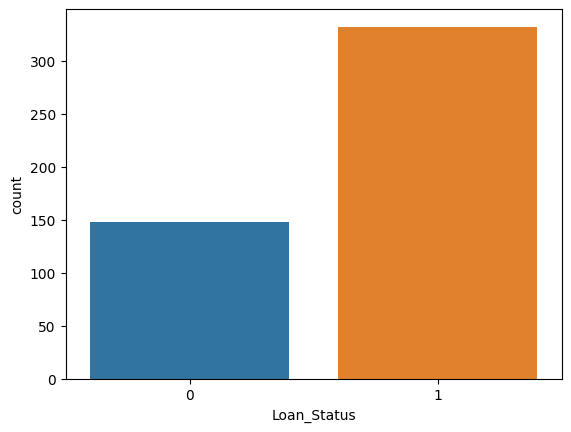

In [ ]:
# Education and Loan status
sns.countplot(x='Loan_Status',  data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

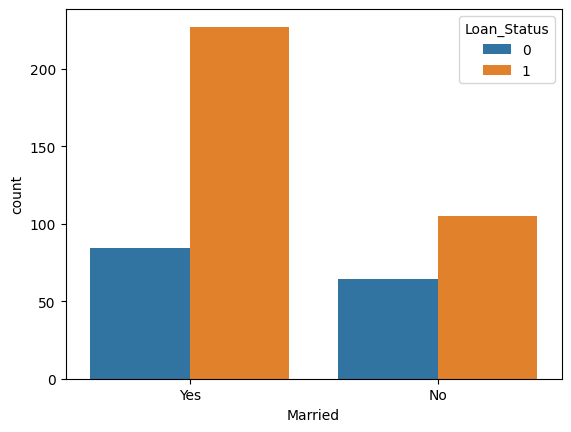

In [ ]:
# Marital Status & Loand Status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

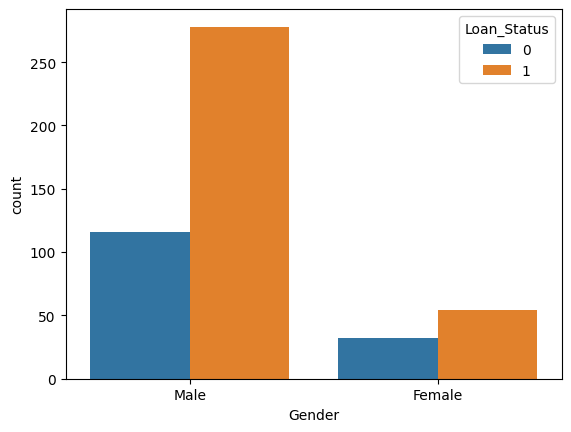

In [ ]:
# Gender and loan_Status
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dataset)

Using Label Encoder to Encode the labels in the dataset so that the computer can understand it.

In [32]:
from sklearn.preprocessing import  LabelEncoder
List = ['Married', 'Gender','Self_Employed','Property_Area','Education']
LE = LabelEncoder()
for values in List:
  loan_dataset[values] = LE.fit_transform(loan_dataset[values])

In [33]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


Since the dataset is imbalance, applying Under-Samplying Technique will help give the model a full insight on what to do

In [34]:
# Checking the total value count of the Loan_Status
loan_dataset.value_counts('Loan_Status')

Loan_Status
1    332
0    148
dtype: int64

In [36]:
loan_dataset.groupby('Loan_Status').mean()

<ipython-input-36-944025adb032>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_dataset.groupby('Loan_Status').mean()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,
0,0.783784,0.567568,0.243243,0.155405,5730.189189,1773.081081,153.378378,342.810811,0.574324,0.986486
1,0.837349,0.683735,0.183735,0.129518,5201.093373,1495.508795,140.882530,341.710843,0.978916,1.039157


0 ------------ Ineligible

 1 ---------- Eligible

In [37]:
Ineligible = loan_dataset[loan_dataset.Loan_Status==0]
Eligible = loan_dataset[loan_dataset.Loan_Status==1]

In [39]:
Ineligible.shape


(148, 13)

In [40]:
Eligible.shape

(332, 13)

Under Sampling

Building a sample dataset containing similar distribution of Ineligible  and Eligible

Number of Ineligible Applicants  ----------------> 148

In [63]:
Eligible_applicants_sample = loan_dataset.sample(n=148)

Concatenating the two Data Frame

In [62]:
new_loan_dataset = pd.concat([Eligible_applicants_sample, Ineligible], axis=0)

In [64]:
new_loan_dataset.replace(to_replace='3+', value= 4, inplace=True)

In [65]:
# Viewing the first 5 rows of our dataset
new_loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
488,LP002555,1,1,2,0,1,4583,2083.0,160.0,360.0,1.0,1,1
357,LP002151,1,1,1,0,0,3875,0.0,67.0,360.0,1.0,2,0
555,LP002792,1,1,1,0,0,5468,1032.0,26.0,360.0,1.0,1,1
10,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1
442,LP002418,1,0,4,1,0,4707,1993.0,148.0,360.0,1.0,1,1


In [66]:
new_loan_dataset.groupby('Loan_Status').mean()

<ipython-input-66-c191a2facdd3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_loan_dataset.groupby('Loan_Status').mean()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,
0,0.796020,0.572139,0.243781,0.149254,5768.990050,1857.084577,156.104478,344.358209,0.601990,0.985075
1,0.842105,0.726316,0.157895,0.200000,5430.442105,1520.505263,144.842105,336.884211,0.978947,1.136842


In [67]:
#separating the data and label
X = new_loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = new_loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=2 )

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(296, 11) (207, 11) (89, 11)


Training the model

SUPPORT VECTOR MACHINE


In [75]:
model = RandomForestClassifier()

In [76]:
# training the svm
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [77]:
#accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)



In [78]:
print("Accuracy score on the training data is : ", training_data_accuray  )

Accuracy score on the training data is :  1.0


In [79]:
#accuracy sore on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [80]:
print('Accuracy score on testing data is :',testing_data_accuracy )

Accuracy score on testing data is : 0.797752808988764


In [81]:
cm = confusion_matrix(Y_test, X_test_prediction)

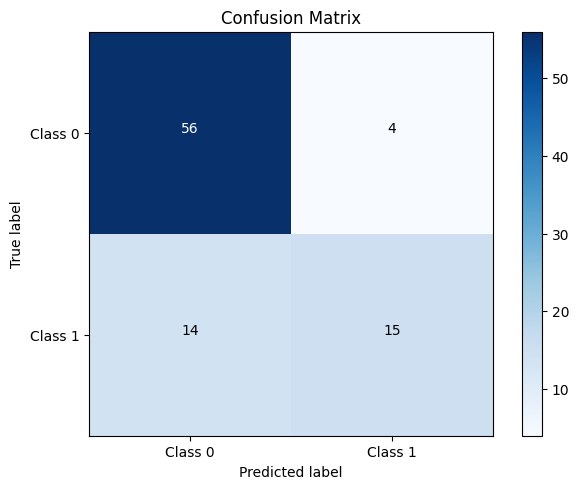

In [82]:
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Labeling the plot
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Making a Predictive System

In [83]:
input_data = (1,1,2,1,1,5417, 4196.0,267.0,360.0,1.0,2)

#input_data as a numpy array
input_data_as_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction == 0:
  print('The person is not eligible for the loan')
else:
  print('Eligible')

[1]
Eligible


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
